In [82]:
import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

# Processing data

In [83]:
lfw_people = fetch_lfw_people(min_faces_per_person=60, resize=0.4)

In [84]:
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

In [85]:
n_samples, h, w

(1277, 50, 37)

### Data Numpy Arrays

In [86]:
X = lfw_people.data
n_features = X.shape[1]

In [87]:
X

array([[0.4379085 , 0.5764706 , 0.48235297, ..., 0.21699347, 0.22745098,
        0.22745098],
       [0.36078432, 0.3895425 , 0.4366013 , ..., 0.37385622, 0.39084968,
        0.40915033],
       [0.15947713, 0.16993465, 0.27973858, ..., 0.2771242 , 0.4745098 ,
        0.64183   ],
       ...,
       [0.0379085 , 0.04705882, 0.16209151, ..., 0.15555556, 0.30980393,
        0.31111112],
       [0.19346406, 0.24705882, 0.34248367, ..., 0.7372549 , 0.6653595 ,
        0.6117647 ],
       [0.21437909, 0.13464053, 0.18562092, ..., 0.669281  , 0.7281046 ,
        0.83529407]], dtype=float32)

### Target and Target Names ( Labels )

In [88]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [89]:
y

array([2, 3, 3, ..., 5, 3, 5], dtype=int64)

In [90]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Junichiro Koizumi', 'Tony Blair'],
      dtype='<U17')

In [91]:
print("Total label using:", n_classes)

Total label using: 7


In [92]:
print("Total dataset size using:")
print("n_samples:", n_samples)
print("n_features:", n_features)
print("n_classes:", n_classes)

Total dataset size using:
n_samples: 1277
n_features: 1850
n_classes: 7


# Pre-Train

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [94]:
x_train

array([[0.46797386, 0.4130719 , 0.44705883, ..., 0.9895425 , 0.9843137 ,
        0.9882353 ],
       [0.6666667 , 0.5398693 , 0.5372549 , ..., 0.4013072 , 0.4117647 ,
        0.43267974],
       [0.4640523 , 0.43790853, 0.47843137, ..., 0.10457516, 0.11764706,
        0.10588235],
       ...,
       [0.33071896, 0.30849674, 0.5437909 , ..., 0.7137255 , 0.5424837 ,
        0.08235294],
       [0.71895427, 0.6718955 , 0.5908497 , ..., 0.5176471 , 0.49411765,
        0.17385621],
       [0.21437909, 0.22352941, 0.31895426, ..., 0.9633987 , 0.9738562 ,
        0.96732026]], dtype=float32)

In [95]:
x_test

array([[0.10196079, 0.17124183, 0.29150328, ..., 0.2771242 , 0.2888889 ,
        0.2784314 ],
       [0.5150327 , 0.4993464 , 0.4614379 , ..., 0.7764706 , 0.8039215 ,
        0.83137256],
       [0.4261438 , 0.46928105, 0.34379086, ..., 0.5137255 , 0.5176471 ,
        0.44052288],
       ...,
       [0.09281046, 0.08888889, 0.10457516, ..., 0.52941173, 0.5398693 ,
        0.56339866],
       [0.33594772, 0.30457518, 0.28235295, ..., 0.42745098, 0.62352943,
        0.69542485],
       [0.12156863, 0.12026144, 0.19869281, ..., 0.7176471 , 0.6745098 ,
        0.6535948 ]], dtype=float32)

### PCA ( Principal Component Analysis )

In [96]:
n_components = 50
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(x_train)

In [97]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [98]:
X_train_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_test)

In [99]:
X_train_pca

array([[-1.2279137 , -0.7843877 ,  0.50765884, ..., -0.91919637,
        -0.38362968,  0.02564375],
       [-0.37121493,  2.736476  , -0.9259312 , ...,  0.83305526,
        -0.3755122 , -0.78071564],
       [ 1.2192593 ,  1.0521525 , -0.46988767, ..., -2.121736  ,
        -1.4006894 , -0.3896233 ],
       ...,
       [-0.6118637 ,  1.6055275 ,  0.07187796, ...,  0.2578306 ,
         0.9719126 , -0.15595244],
       [ 2.0901544 ,  2.1743379 , -1.132998  , ...,  0.5038162 ,
         0.52659696,  0.7319578 ],
       [-2.7131808 , -0.9806078 ,  1.0068016 , ..., -1.9361295 ,
         0.079439  ,  0.39610776]], dtype=float32)

# Traing

## Train a SVM ( Support Vector Machine ) classification model

In [100]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)


## Save model

In [115]:
import joblib

joblib.dump(clf, 'trained_model.pkl')

['trained_model.pkl']

## Testing model

In [108]:
param_grid

{'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0],
 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}

In [109]:
clf

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]})

In [101]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)

Predicting the people names on the testing set


In [102]:
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.62      0.62        13
     Colin Powell       0.88      0.85      0.86        66
  Donald Rumsfeld       0.68      0.57      0.62        30
    George W Bush       0.85      0.93      0.89       139
Gerhard Schroeder       0.74      0.71      0.72        24
Junichiro Koizumi       1.00      1.00      1.00        17
       Tony Blair       0.88      0.74      0.81        31

         accuracy                           0.83       320
        macro avg       0.81      0.77      0.79       320
     weighted avg       0.83      0.83      0.83       320


In [111]:
confusion_matrix(y_test, y_pred, labels=range(n_classes))

array([[  8,   0,   3,   1,   1,   0,   0],
       [  2,  56,   0,   7,   0,   0,   1],
       [  0,   4,  17,   7,   1,   0,   1],
       [  2,   3,   3, 129,   2,   0,   0],
       [  1,   0,   1,   4,  17,   0,   1],
       [  0,   0,   0,   0,   0,  17,   0],
       [  0,   1,   1,   4,   2,   0,  23]], dtype=int64)

In [104]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

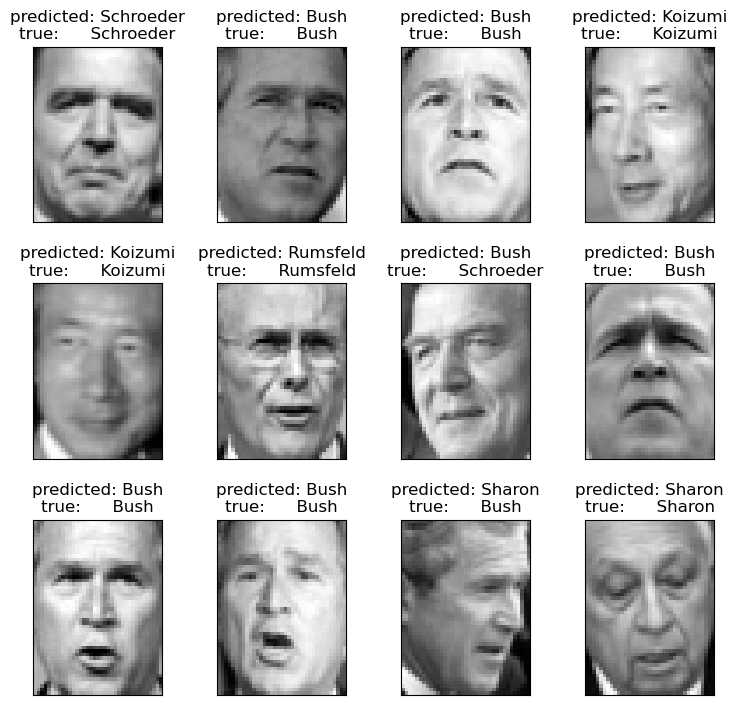

In [113]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(x_test, prediction_titles, h, w)

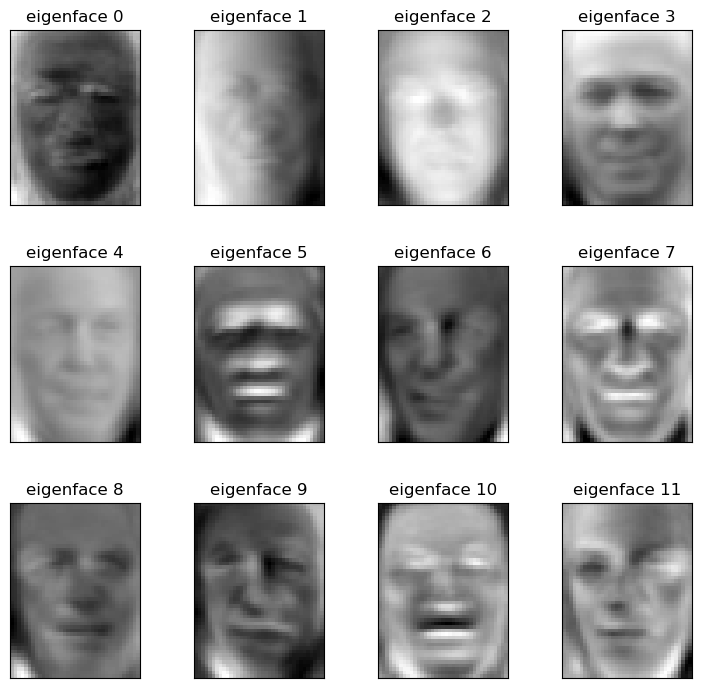

In [106]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

In [107]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.834375
